In [62]:
%load_ext autoreload
%autoreload 2

from sympy import *
from safe_region_utils import *
from symbolic_utils import *
init_printing()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ACAS X Case

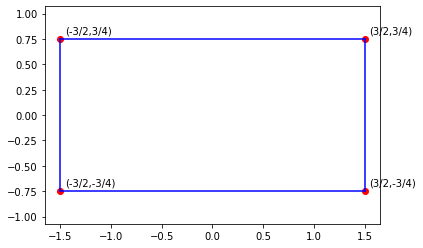

In [63]:
w = 0.75
rect_points: list = [
    geometry.Point(val)
    for val in [[2 * w, -w], [2 * w, w], [-2 * w, w], [-2 * w, -w]]
]
rectangle: geometry.Polygon = Polygon(*rect_points)
plot_polygon(rectangle)

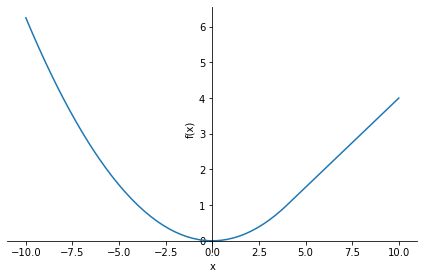

In [61]:
x, y = symbols("x y")

traj_piecewise = Piecewise(
                    (x**2 / 16, x < 4),
                    (x/2 - 1, x >= 4))
plot(traj_piecewise)

In [64]:
domain = Interval(-6, 15)
xbounds = (domain.inf-3, domain.sup+3)
ybounds = (-2, 9)

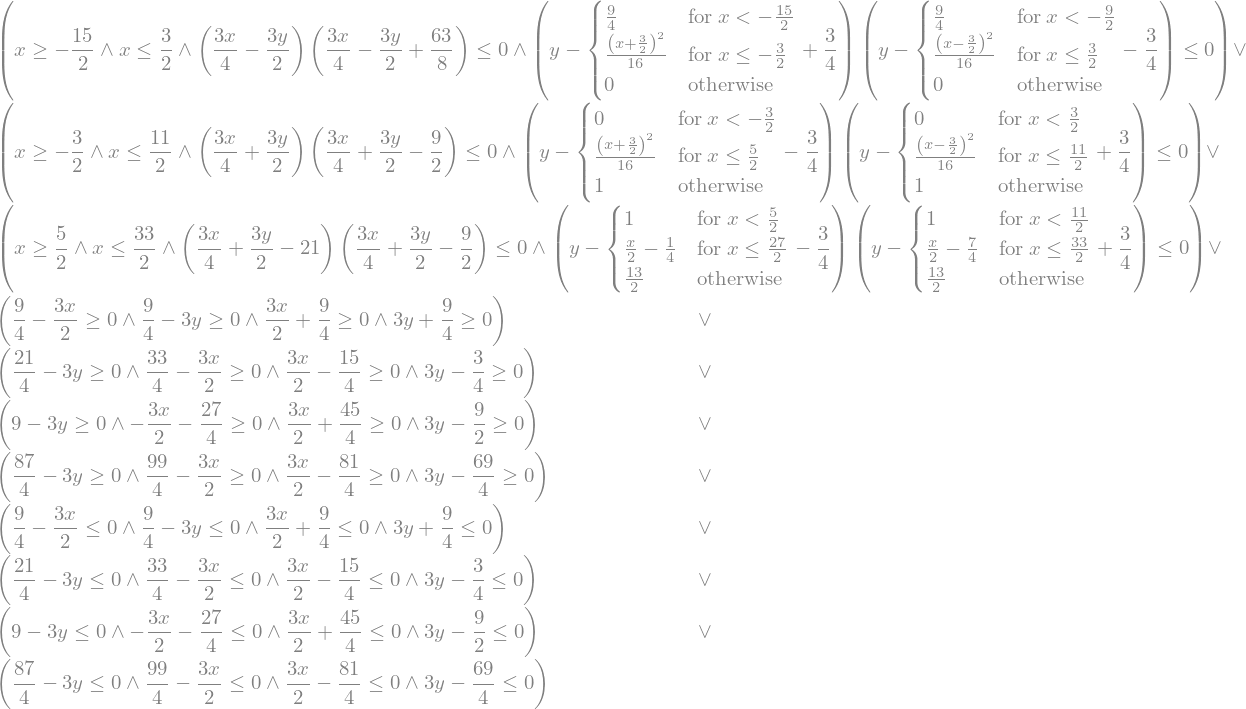

In [65]:
example_name = "ACAS X Climb with Rectangle"

cond = compute_unsafe_cond(
    x, y,
    rectangle,
    traj_piecewise,
    domain = domain, 
)
cond

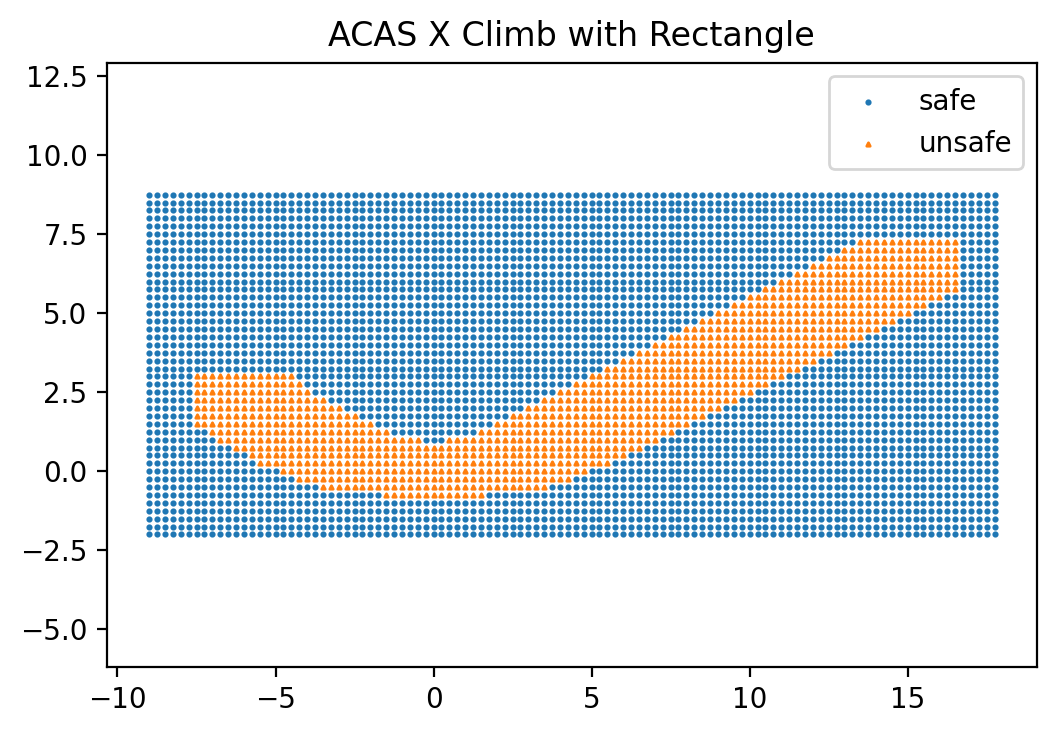


Show[
    RegionPlot[((9/4 - 3*x/2 >= 0) && (9/4 - 3*y >= 0) && (3*x/2 + 9/4 >= 0) && (3*y + 9/4 >= 0)) || ((21/4 - 3*y >= 0) && (33/4 - 3*x/2 >= 0) && (3*x/2 - 15/4 >= 0) && (3*y - 3/4 >= 0)) || ((9 - 3*y >= 0) && (-3*x/2 - 27/4 >= 0) && (3*x/2 + 45/4 >= 0) && (3*y - 9/2 >= 0)) || ((87/4 - 3*y >= 0) && (99/4 - 3*x/2 >= 0) && (3*x/2 - 81/4 >= 0) && (3*y - 69/4 >= 0)) || ((9/4 - 3*x/2 <= 0) && (9/4 - 3*y <= 0) && (3*x/2 + 9/4 <= 0) && (3*y + 9/4 <= 0)) || ((21/4 - 3*y <= 0) && (33/4 - 3*x/2 <= 0) && (3*x/2 - 15/4 <= 0) && (3*y - 3/4 <= 0)) || ((9 - 3*y <= 0) && (-3*x/2 - 27/4 <= 0) && (3*x/2 + 45/4 <= 0) && (3*y - 9/2 <= 0)) || ((87/4 - 3*y <= 0) && (99/4 - 3*x/2 <= 0) && (3*x/2 - 81/4 <= 0) && (3*y - 69/4 <= 0)) || ((x >= 5/2) && (x <= 33/2) && ((3*x/4 + 3*y/2 - 21)*(3*x/4 + 3*y/2 - 9/2) <= 0) && ((y - Piecewise[{{1, x < 5/2}, {x/2 - 1/4, x <= 27/2}, {13/2, True}}] - 3/4)*(y - Piecewise[{{1, x < 11/2}, {x/2 - 7/4, x <= 33/2}, {13/2, True}}] + 3/4) <= 0)) || ((x >= -15/2) && (x <= 3/2)

In [66]:
plot_condition(x, y, cond, xbounds, ybounds, title=example_name)
mathematica_output = print_mathematica(x, y, cond, xbounds, ybounds, traj_piecewise, rectangle)
print(mathematica_output)

## Symbolic

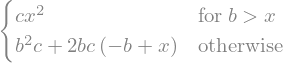

In [67]:
c = Symbol("c", real=True, nonzero=True) # curvature
b = Symbol('b', real=True, positive=True) # boundary

traj_piecewise = Piecewise(
                    (c*x**2, x < b),
                    (2*b*c*(x-b) + b**2*c, x >= b),
                )
traj_piecewise

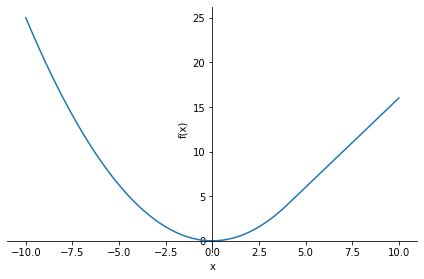

In [15]:
plot(traj_piecewise.subs(c, 0.25).subs(b, 4))

In [16]:
domain = Interval(-12, 9)
xbounds = [-10, 10]
ybounds = [-4, 10]
example_name = "symbolic ACAS X"

In [17]:
piecewise_intervals = [Interval(-oo, b), Interval(b, oo)]
piecewise_intervals

In [68]:
w = Symbol("w", real=True, positive=True, nonzero=True)
h = Symbol("h", real=True, positive=True, nonzero=True)
rect_points: list = [
    geometry.Point(val) for val in [[w, -h], [w, h], [-w, h], [-w, -h]]
]
rect_param: geometry.Polygon = Polygon(*rect_points)
poly = rect_param
poly

TypeError: Cannot convert expression to float

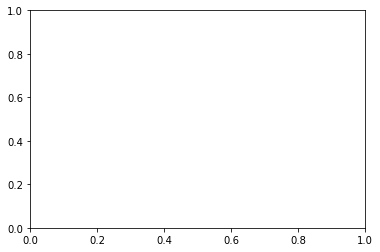

In [29]:
plot_polygon(poly)

In [69]:
clauses_acas, explicit_acas = compute_unsafe_conds_symbolic(
    x, y,
    poly,
    traj_piecewise,
    domain=Reals,
    intervals = piecewise_intervals,
    print_runtime=True,
    print_orderings=False,
)

{Transition(0, 0), Boundary(oo, b**2*c + oo*c), Boundary(b, b**2*c), Boundary(-oo, oo*c)}
Took 0.00017714500427246094 seconds to compute 2 possible orderings.
Took 0.36972594261169434 seconds to compute 2 clauses


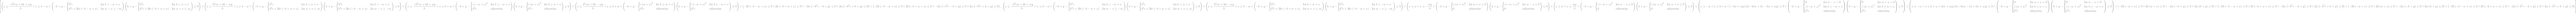

In [70]:
explicit_acas.clauses

Took 0.11620187759399414 seconds to instantiate
[Boundary(-oo, oo*c), Transition(0, 0), Boundary(b, b**2*c), Boundary(oo, b**2*c + oo*c)]


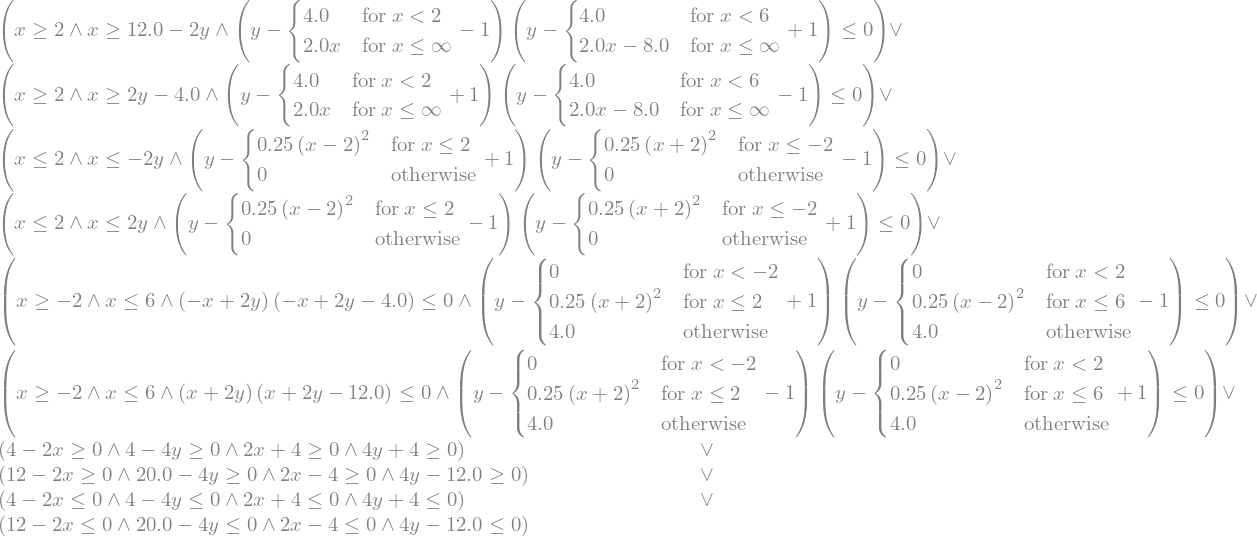

In [71]:
params = [(c, 0.25), (b, 4), (w, 2), (h, 1)]
t0 = time.time()
numeric_acas = explicit_acas.instantiate(params)
print(f"Took {time.time() - t0} seconds to instantiate")
print(numeric_acas.ordering)
numeric_acas.clause

## UAV Collision Avoidance

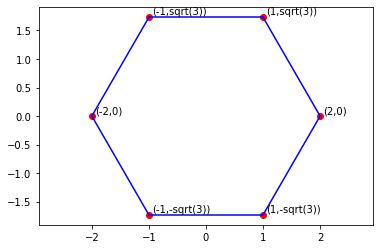

In [74]:
rp = 2
# TODO: symbolic radius for hexagon
hexagon = RegularPolygon(Point(0, 0), rp, 6)

plot_polygon(hexagon)

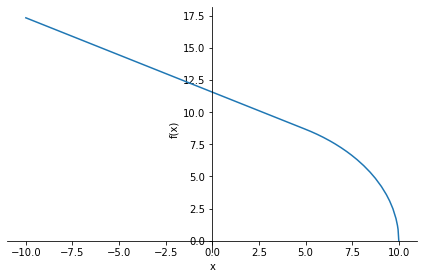

In [75]:
R = 10
theta = pi/3
bound = R / sqrt(tan(theta)**2 + 1)

traj_piecewise = Piecewise(
                    (sqrt(R**2 - x**2), x > bound),
                    (-1/tan(theta)*(x-R*cos(theta)) + R*sin(theta), x <= bound))
plot(traj_piecewise)

In [76]:
# Define domain and plot bounds
domain = Interval(-12, 10)
xbounds = (domain.inf - 3, domain.sup + 3)
ybounds = (-3, 22)
example_name = "Top-Down UAV Trajectory"

In [77]:
cond = compute_unsafe_cond(
    x,
    y,
    hexagon,
    traj_piecewise,
    domain=domain,
)

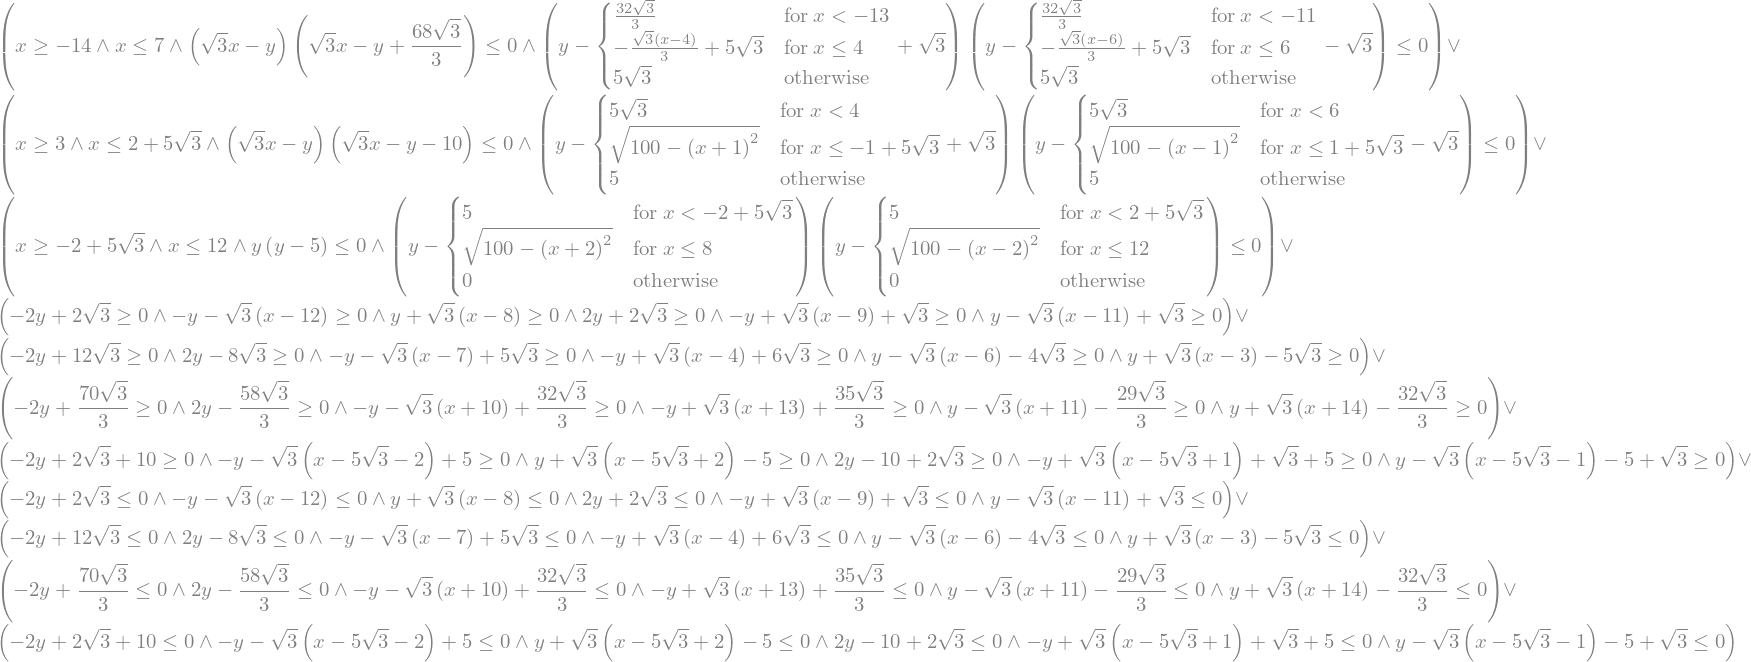

In [78]:
cond

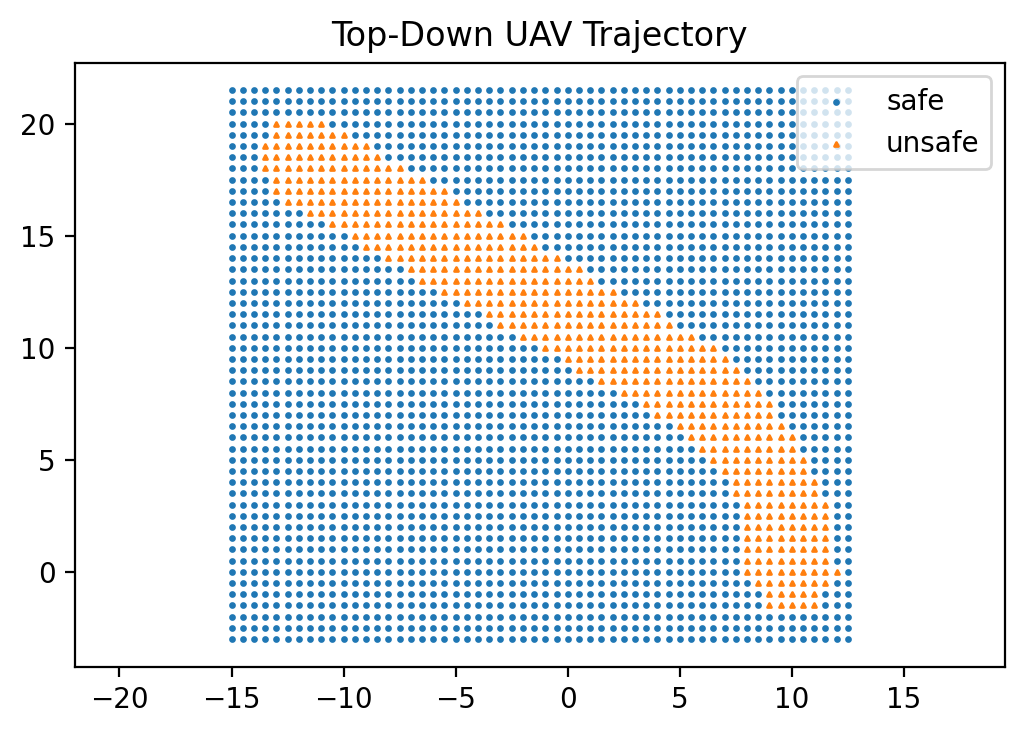

Mathematica command for plotting:
 
Show[
    RegionPlot[((-2*y + 2*Sqrt[3] >= 0) && (y + Sqrt[3]*(x - 8) >= 0) && (2*y + 2*Sqrt[3] >= 0) && (-y - Sqrt[3]*(x - 12) >= 0) && (y - Sqrt[3]*(x - 11) + Sqrt[3] >= 0) && (-y + Sqrt[3]*(x - 9) + Sqrt[3] >= 0)) || ((-2*y + 2*Sqrt[3] <= 0) && (y + Sqrt[3]*(x - 8) <= 0) && (2*y + 2*Sqrt[3] <= 0) && (-y - Sqrt[3]*(x - 12) <= 0) && (y - Sqrt[3]*(x - 11) + Sqrt[3] <= 0) && (-y + Sqrt[3]*(x - 9) + Sqrt[3] <= 0)) || ((x <= 12) && (y*(y - 5) <= 0) && (x >= -2 + 5*Sqrt[3]) && ((y - Piecewise[{{5, x < -2 + 5*Sqrt[3]}, {Sqrt[100 - (x + 2)^2], x <= 8}, {0, True}}])*(y - Piecewise[{{5, x < 2 + 5*Sqrt[3]}, {Sqrt[100 - (x - 2)^2], x <= 12}, {0, True}}]) <= 0)) || ((-2*y + 12*Sqrt[3] >= 0) && (2*y - 8*Sqrt[3] >= 0) && (y + Sqrt[3]*(x - 3) - 5*Sqrt[3] >= 0) && (y - Sqrt[3]*(x - 6) - 4*Sqrt[3] >= 0) && (-y + Sqrt[3]*(x - 4) + 6*Sqrt[3] >= 0) && (-y - Sqrt[3]*(x - 7) + 5*Sqrt[3] >= 0)) || ((-2*y + 70*Sqrt[3]/3 >= 0) && (2*y - 58*Sqrt[3]/3 >= 0) && (y + Sqrt[3]*(x

In [40]:
plot_condition(x, y, cond, xbounds, ybounds, title=example_name, resolution=0.5)
mathematica_output = print_mathematica(
    x, y, cond, xbounds, ybounds, traj_piecewise, hexagon
)
print("Mathematica command for plotting:\n", mathematica_output)

## Symbolic

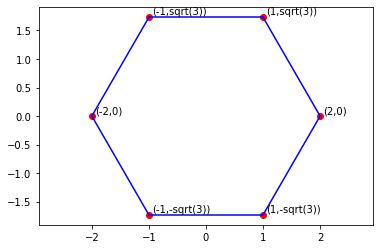

In [49]:
hexagon_symbolic = RegularPolygon(Point(0, 0), w, 6)

plot_polygon(hexagon_symbolic.subs(w, 2))

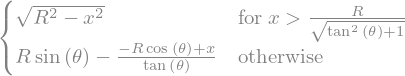

In [80]:
R = Symbol("R", real=True, positive=True, nonzero=True) 
theta = Symbol('theta', real=True, positive=True, nonzero=True)
bound = R / sqrt(tan(theta)**2 + 1)

traj_piecewise = Piecewise(
                    (sqrt(R**2 - x**2), x > bound),
                    (-1/tan(theta)*(x-R*cos(theta)) + R*sin(theta), x <= bound))
traj_piecewise

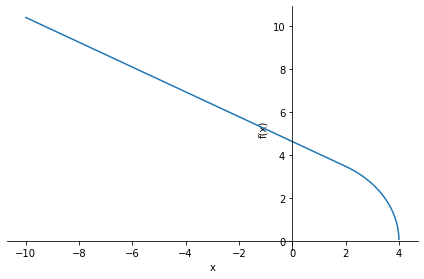

In [83]:
plot(traj_piecewise.subs(R, 4).subs(theta, pi/3))

In [55]:
clauses_uav, explicit_uav = compute_unsafe_conds_symbolic(
    x, y,
    hexagon_symbolic,
    traj_piecewise,
    domain=Reals,
    intervals = [Interval(bound, R), Interval(-oo, bound)],
    print_runtime=True,
    print_orderings=True,
)

{Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))), Transition(0, R), Boundary(-oo, R*sin(theta) + oo/tan(theta)), Transition(-sqrt(3)*R/2, R/2), Boundary(R, 0), Transition(sqrt(3)*R/2, R/2), Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta))}
[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
Boundary(R, 0)]
[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
Transition(0, R),
Boundary(R, 0)]
[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(t

In [56]:
numeric_uav = explicit_uav.instantiate(dict([(R, 4), (theta, pi/3), (w, 2)]))

In [57]:
numeric_uav.ordering

[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
 Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
 Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
 Transition(sqrt(3)*R/2, R/2),
 Boundary(R, 0)]

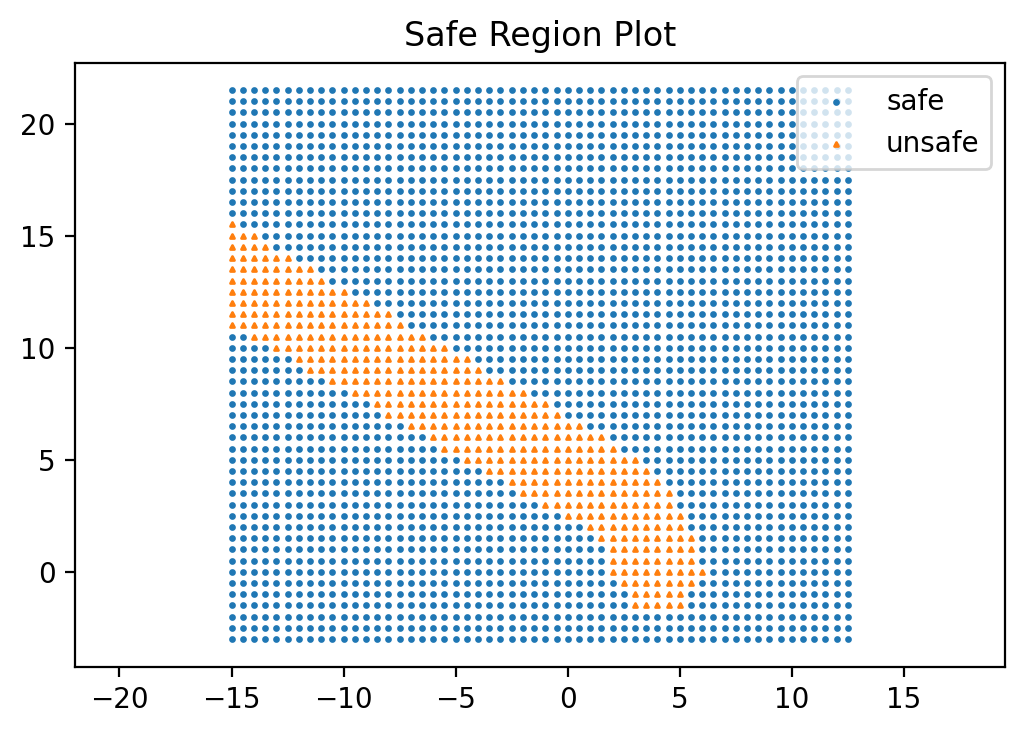

In [59]:
domain = Interval(-12, 10)
xbounds = (domain.inf - 3, domain.sup + 3)
ybounds = (-3, 22)
resolution = 0.5

plot_condition(x, y, numeric_uav.clause, xbounds, ybounds, resolution=resolution)